## Image augmentation

As a part of my mini-project, I had to collate a dataset of australian currency. Due to the limitations I encountered in growing a large enough dataset from google search alone. Therefore, image augmentation was used to increase the size of the dataset

In [1]:
import cv2
from keras.preprocessing.image import ImageDataGenerator
import numpy as np 
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import re
from sklearn.cluster import KMeans
import matplotlib.patches as patches
import pandas as pd
import re
import math

TypeError: Image data of dtype object cannot be converted to float

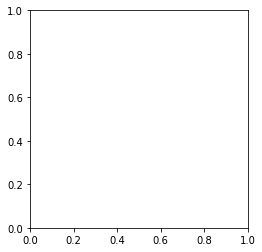

In [39]:
# load in an image, a sample image (Image1.jpg) is provided
img = cv2.imread('D:/projects/dollars_dataset/img109.jpg')
fig,ax = plt.subplots()
ax.imshow(img)

In [79]:
img_expand = np.expand_dims(img, 0)

We will use Keras's ImageDataGenerator to augment these images at scale quickly

In [75]:
datagen = ImageDataGenerator(brightness_range=[0.4,1.0], rotation_range=90)

Below are the results of the transformation, where we created 3 images from one image. This will help us add numbers and diversity to the image dataset

In [76]:
counter = 300
for j in img_list:  
    for i in range(3):
        it = datagen.flow(j, batch_size=1)
        batch = it.next()
        file_name = 'img' + str(counter) + '.jpg'
        img_result = batch[0].astype('uint8')
        cv2.imwrite(file_name, img_result)
        counter += 1
        #fig,ax = plt.subplots()
        #ax.imshow(img_result)

In [69]:
# function for saving images
cv2.imwrite('test_img.jpg', img)

True

## Colour detection

The below section describes the process of how we can pull the most dominant colour of a picture using simple KMeans clustering. <br>
<br>
As the output is only in RGB values, a sorting algorithm will need to be used to match the RGB to colour name. As not all RGB values have a name, the algorithm aims to match the colour to a common colour description

sample images have been provided in the colour detection folder

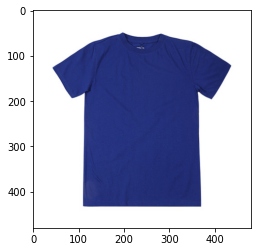

In [202]:
# load the image
img = cv2.imread('D:/projects/blueshirt.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig,ax = plt.subplots()
ax.imshow(img)

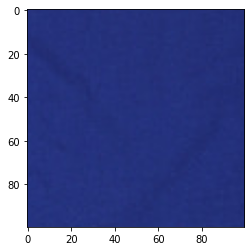

In [203]:
startY = int(img.shape[0] /2 -50)
endY = int(img.shape[0] /2 + 50)
startX = int(img.shape[1] /2 - 50)
endX = int(img.shape[1] /2 + 50)

img = img[startY:endY, startX:endX]
fig,ax = plt.subplots()
ax.imshow(img)

if you want to use your webcam to take a picture to use, run the below code. Press Q to take the picture

In [141]:
# using webcam
vid = cv2.VideoCapture(0)

while True:
    ret, frame = vid.read()
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
vid.release()
cv2.destroyAllWindows()

img = frame

In [204]:
img

array([[[ 41,  53, 129],
        [ 39,  51, 127],
        [ 39,  51, 125],
        ...,
        [ 34,  46, 118],
        [ 37,  47, 119],
        [ 35,  47, 119]],

       [[ 40,  52, 128],
        [ 38,  50, 126],
        [ 40,  52, 126],
        ...,
        [ 36,  48, 120],
        [ 38,  48, 120],
        [ 35,  47, 119]],

       [[ 38,  50, 126],
        [ 39,  51, 127],
        [ 40,  54, 129],
        ...,
        [ 35,  47, 121],
        [ 36,  48, 120],
        [ 35,  47, 119]],

       ...,

       [[ 35,  51, 128],
        [ 34,  52, 128],
        [ 37,  50, 128],
        ...,
        [ 37,  49, 123],
        [ 36,  49, 127],
        [ 35,  48, 126]],

       [[ 39,  50, 130],
        [ 39,  50, 130],
        [ 38,  51, 129],
        ...,
        [ 38,  52, 127],
        [ 34,  48, 123],
        [ 34,  48, 123]],

       [[ 38,  49, 128],
        [ 38,  49, 128],
        [ 38,  51, 129],
        ...,
        [ 34,  48, 121],
        [ 34,  48, 123],
        [ 34,  48, 123]]

In [205]:
img = img.reshape((img.shape[0] * img.shape[1], 3))

In [206]:
# create the K means clustering function
# set clusters to 2 as we only want the dominant colours of the picutres
clt = KMeans(n_clusters = 2)
clt.fit(img)

KMeans(n_clusters=2)

In [207]:
kmeans_label = list(clt.labels_)

In [208]:
# find the center of the cluster centres
clt_centroids = clt.cluster_centers_

In [209]:
clt_centroids

array([[ 37.48828829,  50.62414414, 126.6245045 ],
       [ 35.42      ,  47.85797753, 121.61213483]])

In [210]:
# here we are trying to find which centroid is more dominant by performing a count
percent=[]
for i in range(len(clt_centroids)):
  j=kmeans_label.count(i)
  j=j/(len(kmeans_label))
  percent.append(j)

target_ind = percent.index(max(percent))
target_ind

0

In [211]:
# once we find the centroid that is most dominant, we set that as our test_arr
# we will then pass the test_arr through the sorting algorithm to get the correct colour
test_arr= clt_centroids[target_ind]

In [212]:
test_arr

array([ 37.48828829,  50.62414414, 126.6245045 ])

### Colour sorting algorithm

We can now use the colour sorting algorithm to transform the RGB values into the major colours. For this notebook the major colours are : Red, Green, Blue, Yellow, Orange, Purple, Black and Grey

The algorithm first works by identifying the top two colour components among RGB. Below is the code that performs that

In [213]:
test_arr = test_arr.tolist()

In [214]:
test_arr_copy = test_arr

In [215]:
test_arr_copy = sorted(test_arr_copy, reverse = False)

In [216]:
first_value = test_arr.index(test_arr_copy[len(test_arr_copy) -1])
test_arr_copy.pop()

126.6245045045045

In [217]:
second_value = test_arr.index(test_arr_copy[len(test_arr_copy) -1])
test_arr_copy.pop()

50.62414414414415

In [218]:
first_value

2

Once we know our top two colours, we pass it through our sorting algorithm below

In [233]:
color = None

In [234]:
#black, grey rules
if test_arr[0] <= 27 and test_arr[1] <= 27 and test_arr[2] <= 27:
    color = 'Black'
    
elif test_arr[0] == test_arr[1] and test_arr[0] == test_arr[2] and test_arr[0] < 218 and test_arr[0] > 27:
    color = 'Grey'
    
elif test_arr[0] > 218 and test_arr[1] > 218 and test_arr[2] > 218: 
    color = 'White'

In [235]:
color

In [236]:
# blue, red rules
if first_value + second_value == 2:
    if first_value ==0:
        R = test_arr[first_value]
        B = test_arr[second_value]
    else:
        B = test_arr[first_value]
        R = test_arr[second_value]
        
        
    if R > B:
        color = 'Red'
    elif B > R and R > 60:
        color = 'Purple'
        
    elif B > R and R <= 60:
        color = 'Blue'
        
    else:
        pass

        

In [240]:
color

In [241]:
# red, green rules
if first_value + second_value == 1:
    if first_value ==0:
        R = test_arr[first_value]
        G = test_arr[second_value]
    else:
        G = test_arr[first_value]
        R = test_arr[second_value]
        
    if G == 255 and R <= 210:
        color = 'Green'
    
    elif R>= 210 and G > 180:
        color = 'Yellow'
        
    elif R>= 210 and (G <= 180 and G> 60):
        'Orange'
    
    elif R>= 210 and G <= 60:
        'Red'
        
    else:
        pass
    

In [242]:
color

In [243]:
# blue, green values
if first_value + second_value == 3:
    if first_value ==2:
        B = test_arr[first_value]
        G = test_arr[second_value]
    else:
        G = test_arr[first_value]
        B = test_arr[second_value]
        
        
    if G  > B:
        color = 'Green'
    elif B > G:
        color = 'Blue'
        
    else:
        pass
    

In [244]:
if color == None:
    color = 'Error, sorting algorithm has not managed to match a colour'

Running the below cell if now show what colour the algorithm has picked. If no colour has been picked, an error message will be returned

In [245]:
color

'Blue'